Importing dependencies and data

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./gapminder.csv", sep=";")

Formatting data set visualization

In [30]:
plt.style.use("ggplot")

pd.set_option('display.precision', 2)

df.columns = df.columns.str.capitalize()
df = df.rename(columns={
  "Lifeexp":"Life expectancy",
  "Pop":"Population total",
  "Gdppercap": "GDP per capta"
  })

df = df.dropna()

In [31]:
# All columns
df.columns

Index(['Country', 'Continent', 'Year', 'Life expectancy', 'Population total',
       'GDP per capta'],
      dtype='object')

<h3> Analysis per continent </h3>

In [32]:
# All unique continents
df["Continent"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [33]:
# Setting variables
years = df["Year"].unique()

colors_dictionary = {
  "Asia" : "Purple",
  "Europe" : "Red",
  "Africa" : "Black",
  "Americas" : "Green",
  "Oceania" : "Blue"
}


<h4> Countries per continent </h4>

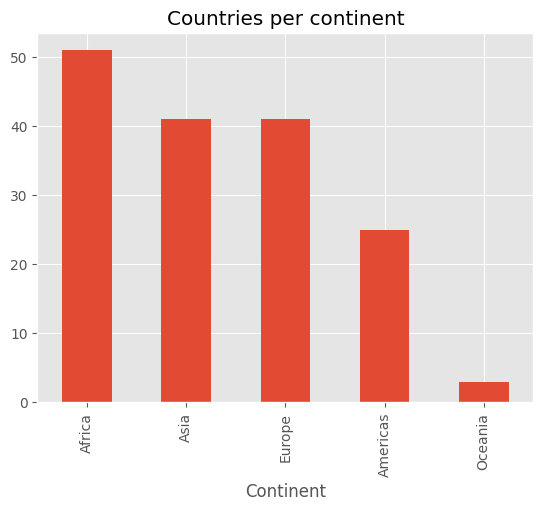

In [34]:
countries_grouped_by_continent = df.groupby("Continent")["Country"]
sorted_values =  countries_grouped_by_continent.nunique().sort_values(ascending=False)

sorted_values.plot.bar(title="Countries per continent");

<h4> Average life expectancy by continent </h4>

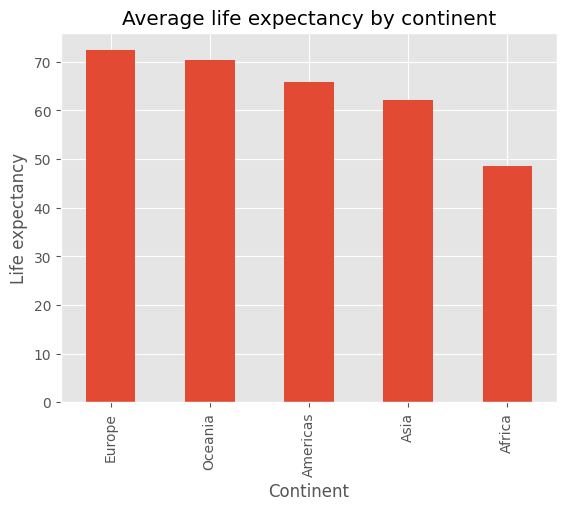

In [35]:
life_exp_grouped_by_continent = df.groupby("Continent")["Life expectancy"]
sorted_values =  life_exp_grouped_by_continent.mean().sort_values(ascending=False)
plt.ylabel("Life expectancy")
sorted_values.plot.bar(title="Average life expectancy by continent");

<h4> Average life expectancy by continent through the years </h4>

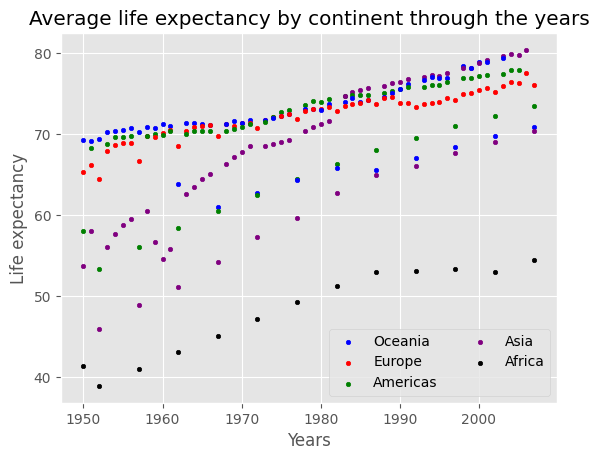

In [36]:
colors_dictionary = {
  "Asia" : "Purple",
  "Europe" : "Red",
  "Africa" : "Black",
  "Americas" : "Green",
  "Oceania" : "Blue"
}

already_labeled = []

for year in years:
  annual_averages = df.loc[df["Year"] == year].groupby("Continent")["Life expectancy"].mean().sort_values(ascending=False)
  continents = annual_averages.keys()
  for continent in continents:
    label = ""
    if continent not in already_labeled:
      label = continent
      already_labeled.append(continent)

    plt.scatter(x = year, y = annual_averages[continent],
    c = colors_dictionary[continent], s = 10, label = label)

plt.xlabel("Years")
plt.ylabel("Life expectancy")
plt.title("Average life expectancy by continent through the years");
plt.legend(loc = "lower right", ncols = 2);

<h4> Average GDP per capta by continent </h4>

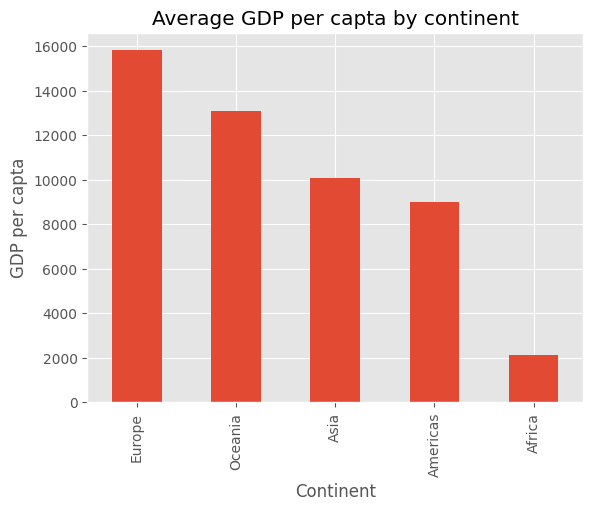

In [37]:
gdp_grouped_by_continent = df.groupby("Continent")["GDP per capta"]
sorted_values =  gdp_grouped_by_continent.mean().sort_values(ascending=False)
plt.ylabel("GDP per capta")
sorted_values.plot.bar(title="Average GDP per capta by continent");

<h4> Average GDP per capta by continent through the years </h4>

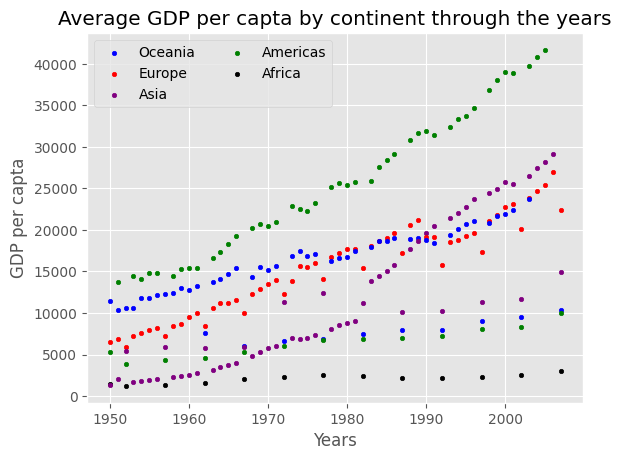

In [38]:
already_labeled = []

for year in years:
  annual_averages = df.loc[df["Year"] == year].groupby("Continent")["GDP per capta"].mean().sort_values(ascending=False)
  continents = annual_averages.keys()
  for continent in continents:
    label = ""
    if continent not in already_labeled:
      label = continent
      already_labeled.append(continent)

    plt.scatter(x = year, y = annual_averages[continent],
    c = colors_dictionary[continent], s = 10, label = label)

plt.xlabel("Years")
plt.ylabel("GDP per capta")
plt.title("Average GDP per capta by continent through the years");
plt.legend(loc = "upper left", ncols = 2);

<h3> American Continent Analysis </h3>

In [39]:
# Setting variables
df_americas = df.loc[df["Continent"] == "Americas"]

In [40]:
# All American countries
df_americas["Country"].unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Cuba', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Guatemala', 'Guyana', 'Honduras', 'Jamaica',
       'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico',
       'Suriname', 'Trinidad and Tobago', 'United States', 'Uruguay',
       'Venezuela'], dtype=object)

<h4> Average life expectancy by American country </h4>

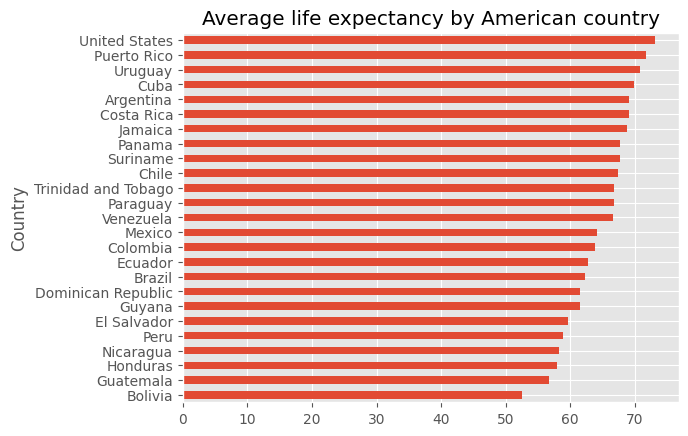

In [41]:
life_exp_grouped_by_country = df_americas.groupby("Country")["Life expectancy"]
sorted_values =  life_exp_grouped_by_country.mean().sort_values()
plt.ylabel("Life expectancy")
sorted_values.plot.barh(title="Average life expectancy by American country");

<h4> Average life expectancy by American country through the years </h4>

In [42]:
# Considering only top 5 countries + Brasil
all_countries = life_exp_grouped_by_country.mean().sort_values(ascending=False)
countries = all_countries[:5].keys().union(["Brazil"])
countries

Index(['Argentina', 'Brazil', 'Cuba', 'Puerto Rico', 'United States',
       'Uruguay'],
      dtype='object', name='Country')

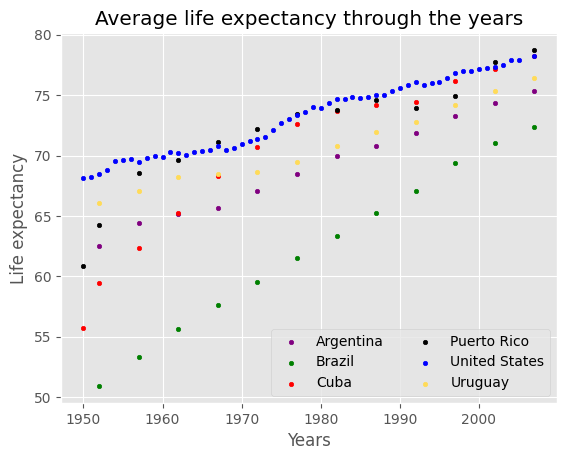

In [43]:
colors_dictionary = {
  "Argentina" : "Purple",
  "Brazil" : "Green",
  "Cuba" : "Red",
  "Puerto Rico" : "Black",
  "United States" : "Blue",
  "Uruguay" : "#FFDB58"
}

for country in countries:
  data = df.loc[df["Country"] == country]
  plt.scatter(x = data["Year"],
  y = data["Life expectancy"],
  c = colors_dictionary[country],
  s = 10, label = country)

plt.xlabel("Years")
plt.ylabel("Life expectancy")
plt.title("Average life expectancy through the years");
plt.legend(loc = "lower right", ncols = 2);

<h4> Average GDP per capta by American country </h4>

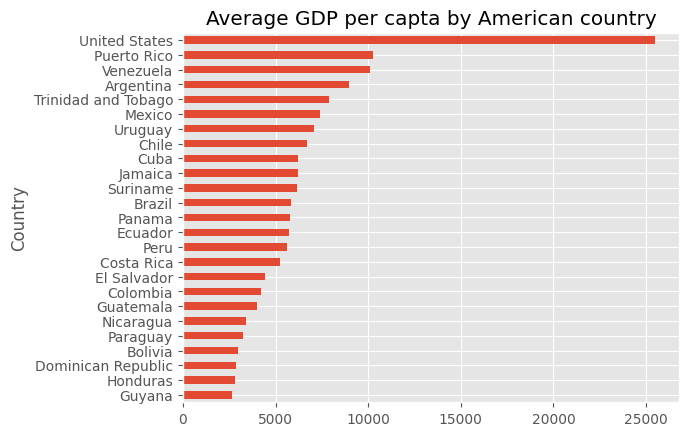

In [44]:
gdp_grouped_by_country = df_americas.groupby("Country")["GDP per capta"]
sorted_values =  gdp_grouped_by_country.mean().sort_values()
plt.ylabel("GDP per capta")
sorted_values.plot.barh(title="Average GDP per capta by American country");

<h4> Average GDP per capta by American country through the years </h4>

In [45]:
# Considering only top 5 countries + Brasil
all_countries = gdp_grouped_by_country.mean().sort_values(ascending=False)
countries = all_countries[:5].keys().union(["Brazil"])
countries

Index(['Argentina', 'Brazil', 'Puerto Rico', 'Trinidad and Tobago',
       'United States', 'Venezuela'],
      dtype='object', name='Country')

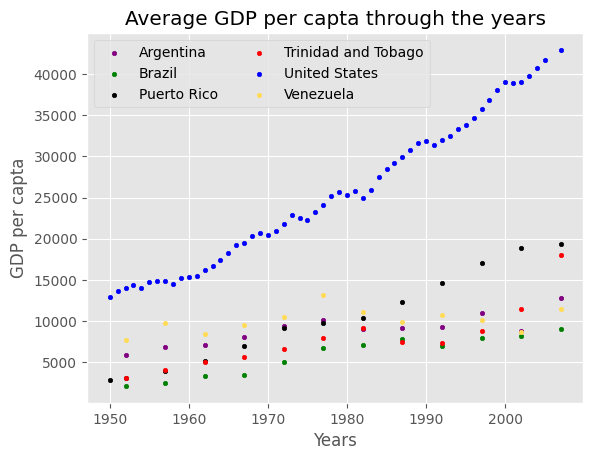

In [46]:
colors_dictionary = {
  "Argentina" : "Purple",
  "Brazil" : "Green",
  "Trinidad and Tobago" : "Red",
  "Puerto Rico" : "Black",
  "United States" : "Blue",
  "Venezuela" : "#FFDB58"
}

for country in countries:
  data = df.loc[df["Country"] == country]
  plt.scatter(x = data["Year"],
  y = data["GDP per capta"],
  c = colors_dictionary[country],
  s = 10, label = country)

plt.xlabel("Years")
plt.ylabel("GDP per capta")
plt.title("Average GDP per capta through the years");
plt.legend(loc = "upper left", ncols = 2);